# Project: TMDb Movie Data Analysis

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time..

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project we will be analysing data associated this movies collected from The Movie Database (TMDb) using numpy, pandas matplotlib and seaborn. We will answer the following question: 
>  1. Which movie returns the highest and lowest revenue?
>  2. Which movie returns the highest profit?
>  3. Which movie requires the highest and lowest budget?
>  4. Which movie has the highest and lowest runtime?
>  5. Which movie has the highest and lowest rating ?
>  6. Which movie has the highest and lowest vote count ?
>  7. Which movie has the highest and lowest popularity?
>  9. Which year has the highest and lowest runtime?
>  8. Which year has the highest and lowest release of movies?
>  10. Which genre occured most?
>  11. Which genres are most popular from year to year?
>  12. How much do the movie genres changes from year to year?
>  13. What kinds of properties are associated with movies that have high revenues?
 

In [1]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Making sure to document our steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Loading the data and printing out the first 5 lines. 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# The table columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### Columns Description
> - id: Index of each movie on the dataframe.
> - imdb_id: The Movie Id in the Movie database.
> - popularity: The popularity of the movie.
> - budget: The Amount budgetted for the production of the movie.
> - revenue: The revenue amount from the movie.
> - original_title: Title of the movie.
> - cast: Main actor or actress in the movie.
> - homepage: The website for the movie.
> - director: The person who directed the movie.
> - tagline: The slogans or catchphrases of the movie.
> - keywords: Some keywords from the movie.
> - overview: The movie overview.
> - runtime: The length of the movie.
> - genres:  The genres of the movie.
> - production_companies: The company that produce the movie.
> - release_date: The data the movie was relase.
> - vote_count: Number of people who vote or rate the movie (from 0 to 10).
> - vote_average: The average vote or rate of the movie.
> - release_year: The year the movie was release.
> - budget_adj: The adjusted budget in 2010 dollar and accouting for inflation over time.
> - revenue_adj: The adjusted revenue in 2010 dollar and accouting for inflation over time.

In [4]:
# Get shape of the dataset
df.shape

(10866, 21)

In [5]:
#Get basic descriptive statistic for numerical data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The average popularity of the movies is 0.646441 with 75 percent of the movies popularity below 1
The average budget of the movies is approximatetly 14.6 million and 75 percent of the budget is below 15 million
The average revenue of the movies is approximatetly 39.8 million and 75 percent of the revenue is below average
The majority of the movie runtime is between 90 to 111
The least movie vote count is 10 with maximum vote count 9767
50 percent of vote_average is approximatly close to average vote_average
Like revenue, 75 percent of the revenue_adj is below average
The average budget_adj of the movies is approximatetly 17.6 million and 75 percent of the budget below 20 million

In [6]:
# Get summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#get the total number of row with missing data for each column
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are 10 missing imdb_id, about 100 missing cast.
Majority of the movie homepage is missing.
Approximatly 2800 taglines,1400 keywords and 1000 production_companies fields are missing.

### Data Cleaning (Removing unwanted data and formarting the dataset!)

In [8]:
df.drop(['id','imdb_id','cast','homepage','tagline','keywords','overview','production_companies'], axis=1, inplace=True)

>  - Dropping Cast, homepage, tagline, keywords and production_companies due to missing values.
>  - Dropping Id, imdb_id, overview because it will not help in the analysis due to it's uniqueness to each observation.


In [9]:
# Drop any row with missing value
df.dropna(axis=0, inplace=True)

In [10]:
# Convert budget and revenue to float
# This is done for budget and revenue to have the same datatype like budget_adj and revenue_adj
df['budget']= df['budget'].astype(float)
df['revenue'] =df['revenue'].astype(float)

In [11]:
# Convert the original_title from object datatype to string datatype
df['original_title'] = df['original_title'].astype('string')

In [12]:
#convert release_date to date datatype
df['release_date'] = pd.to_datetime(df['release_date'])

In [13]:
# To drop any duplicate
df.drop_duplicates(inplace=True)

In [14]:
#To remove observation with revenue equals to 0
df = df[df['revenue'] != 0]

In [15]:
#To remove observation with observation equals to 0
df = df[df['budget'] != 0]

There are lots of movies where the budget or revenue have a value of '0' which means that the values of those variables of those movies has not been recorded, this may be due to lack of information about the movie or the movies that were never released.

In [16]:
# Printing the shape after cleaning
df.shape

(3853, 13)

In [17]:
# Display the first 5 rows of the new clean dataset
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Which movie returns the highest and lowest revenue ?

In [18]:
# Get movie with highest revenue
df[df['revenue'] ==df['revenue'].max()]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000.0,2.781506e+09,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


In [19]:
# Get movie with lowest revenue
df[df['revenue_adj'] ==df['revenue_adj'].min()]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5067,0.462609,6000000.0,2.0,Shattered Glass,Billy Ray,94,Drama|History,2003-11-14,46,6.4,2003,7.112116e+06,2.370705


In [20]:
# function for point plot
def point_plot(data,x,y,title,xlab,ylab):
# Use seaborn pointplot
    sns.pointplot(data=data,x=x,y=y);
# Add title to the plot
    plt.title(title,fontsize = 15)
# Label the x axis of the plot
    plt.xlabel(xlab,fontsize = 14)
# Label the y axis of the plot
    plt.ylabel(ylab,fontsize = 14);

#function for bar plot
def bar_plot(data,x,y,title,xlab,ylab):
# Use seaborn barplot
    sns.barplot(data=data,x=x,y=y);
# Add title to the plot
    plt.title(title,fontsize = 15)
# Label the x axis of the plot
    plt.xlabel(xlab,fontsize = 14)
# Label the y axis of the plot
    plt.ylabel(ylab,fontsize = 14);

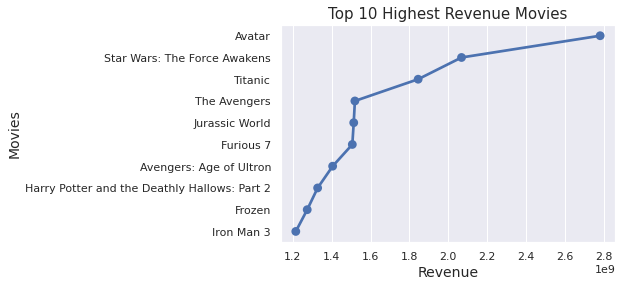

In [21]:
# Plot of top 10 highest revenue
top_reve = df.nlargest(10, 'revenue')
point_plot(top_reve,'revenue','original_title',"Top 10 Highest Revenue Movies",'Revenue','Movies')

> From the above code and graph, the ***'Avatar'*** movie released in 2009 generated  the highest revenue, making over 2.7Billion while the ***'Shatterd Glass'*** movie produced in 2003 generated a revenue of 2 which is the lowest.

### 2. Which movie returns the highest profit?

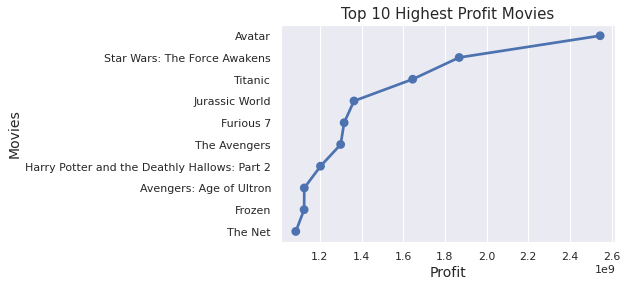

In [22]:
# make a copy of the dataset
new_df = df.copy()
#creat profit column and add to the new dataset
new_df['profit'] = new_df['revenue'] - new_df['budget']
# find the top 10 highest profit
top_pro = new_df.nlargest(10, 'profit')
point_plot(top_pro,'profit','original_title',"Top 10 Highest Profit Movies",'Profit','Movies')

> From the above code and graph, the ***'Avatar'*** movie released in 2009 generated the highest revenue, making over 2.7Billion 

### 3. Which movie requires the highest and lowest budget ?

In [23]:
# Get movie with highest budget
df[df['budget'] ==df['budget'].max()]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,0.25054,425000000.0,11087569.0,The Warrior's Way,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010,425000000.0,11087569.0


In [24]:
# Get movie with lowest budget
df[df['budget'] ==df['budget'].min()]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2618,0.090186,1.0,100.0,Lost & Found,Jeff Pollack,95,Comedy|Romance,1999-04-23,14,4.8,1999,1.309053,130.905285
3581,0.520430,1.0,1378.0,"Love, Wedding, Marriage",Dermot Mulroney,90,Comedy|Romance,2011-06-03,55,5.3,2011,0.969398,1335.830503


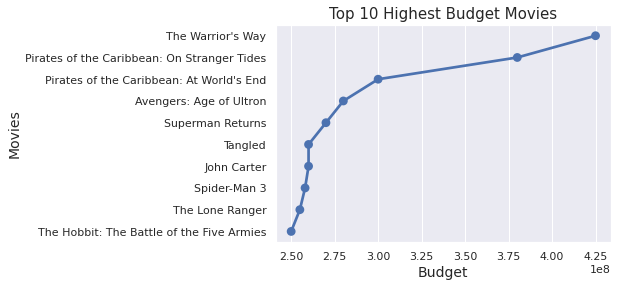

In [25]:
#plot the top 10 highest budget movies
top_bud = df.nlargest(10, 'budget')
point_plot(top_bud,'budget','original_title',"Top 10 Highest Budget Movies",'Budget','Movies')

### 4. Which movie has the highest and lowest runtime ?

In [26]:
# Get movie has highest runtime
df[df['runtime'] ==df['runtime'].max()]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2107,0.534192,18000000.0,871279.0,Carlos,Olivier Assayas,338,Crime|Drama|Thriller|History,2010-05-19,35,6.2,2010,18000000.0,871279.0


In [27]:
# Get movie has lowest runtime
df[df['runtime'] ==df['runtime'].min()]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5162,0.208637,10.0,5.0,Kid's Story,Shinichiro Watanabe,15,Science Fiction|Animation,2003-06-02,16,6.8,2003,11.853526,5.926763


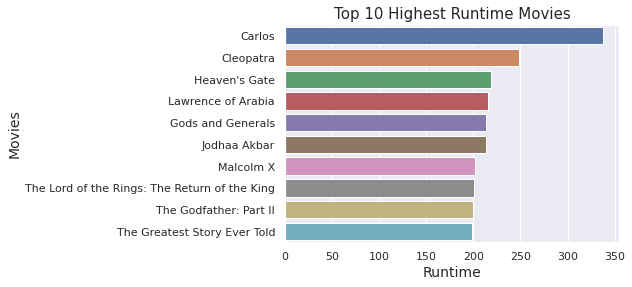

In [28]:
#Plot Movie with highest runtime
top_run = df.nlargest(10, 'runtime')
bar_plot(top_run,'runtime','original_title',"Top 10 Highest Runtime Movies",'Runtime','Movies')

> From the above code and graph, the ***'Carloss'*** movie directed by **Olivier Assayas** has the highest runtime.

### 5. Which movie has the highest and lowest rating ?

In [29]:
# Get the movie with highest rating
df[df['vote_average'] ==df['vote_average'].max()]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4178,7.192039,25000000.0,28341469.0,The Shawshank Redemption,Frank Darabont,142,Drama|Crime,1994-09-10,5754,8.4,1994,3.677779e+07,4.169346e+07
7948,0.283191,1200000.0,4978922.0,Stop Making Sense,Jonathan Demme,88,Documentary|Music,1984-11-16,23,8.4,1984,2.518850e+06,1.045097e+07


In [30]:
# Get movie with lowest rating
df[df['vote_average'] ==df['vote_average'].min()]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4859,0.111351,65000000.0,73706.0,Foodfight!,Lawrence Kasanoff,87,Animation|Action|Comedy|Family,2012-06-15,12,2.2,2012,6.173338e+07,70001.852001


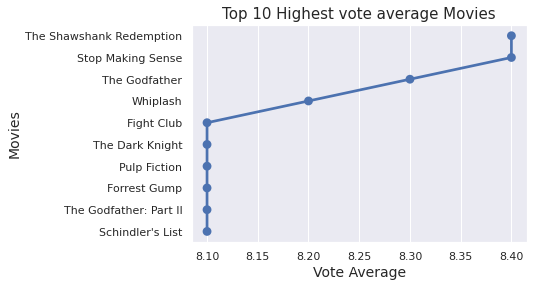

In [31]:
#plot top 10 highest rating moving
top_vave = df.nlargest(10, 'vote_average')
point_plot(top_vave,'vote_average','original_title',"Top 10 Highest vote average Movies",'Vote Average','Movies');

> **The Shawshank Redemption** and **Stop Making Sense** directed by Frank Darabont	and Jonathan Demme respectively has the highest rating  of 8.4 meanwhile **Foodfight!** directed by Lawrence Kasanoff has the lowest rating of 2.2

### 6. Which movie has the highest and lowest vote count ?

In [32]:
# Get movie with highest vote count
df[df['vote_count'] ==df['vote_count'].max()]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,9.363643,160000000.0,825500000.0,Inception,Christopher Nolan,148,Action|Thriller|Science Fiction|Mystery|Adventure,2010-07-14,9767,7.9,2010,160000000.0,825500000.0


In [33]:
# Get movie with lowest vote count
df[df['vote_count'] ==df['vote_count'].min()]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1818,0.159638,1500000.0,56000.0,Beautiful,Dean O'Flaherty,97,Drama|Mystery|Thriller,2009-04-27,10,4.4,2009,1.524601e+06,5.691842e+04
2536,0.312759,7000000.0,14011454.0,In Too Deep,Michael Rymer,97,Drama|Action|Thriller|Crime,1999-08-25,10,6.5,1999,9.163370e+06,1.834173e+07
2610,0.118187,450000.0,2049595.0,Trick,Jim Fall,89,Comedy|Romance,1999-07-23,10,6.5,1999,5.890738e+05,2.683028e+06
2805,0.251798,250000.0,4186931.0,Lovely & Amazing,Nicole Holofcener,91,Comedy|Drama|Romance,2001-08-31,10,6.3,2001,3.078720e+05,5.156156e+06
2855,0.128169,15000000.0,163169.0,Down,Dick Maas,111,Action|Horror|Mystery|Thriller,2001-05-11,10,3.7,2001,1.847232e+07,2.009407e+05
3272,0.281186,6000000.0,1300000.0,Julia,Erick Zonca,138,Drama,2008-02-09,10,7.1,2008,6.076720e+06,1.316623e+06
4176,0.017708,40000.0,1434436.0,The Kid Stays in the Picture,Nanette Burstein|Brett Morgen,93,Documentary,2002-01-18,10,7.4,2002,4.849046e+04,1.738911e+06
4831,0.139047,500000.0,1000000.0,Redd Inc.,Daniel Krige,93,Thriller|Horror|Comedy,2012-11-03,10,5.3,2012,4.748721e+05,9.497443e+05
5332,0.425112,32000000.0,3566637.0,Cats Don't Dance,Mark Dindal,75,Animation|Comedy|Family|Music,1997-03-26,10,7.1,1997,4.347073e+07,4.845135e+06
5679,0.442256,17500000.0,7018189.0,Black Nativity,Kasi Lemmons,93,Drama|Music,2013-11-27,10,6.2,2013,1.638058e+07,6.569259e+06


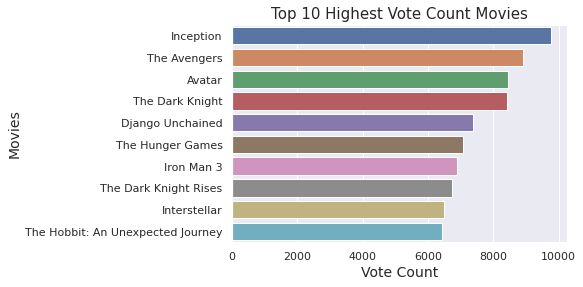

In [34]:
top_cntave = df.nlargest(10, 'vote_count')
bar_plot(top_cntave,'vote_count','original_title',"Top 10 Highest Vote Count Movies",'Vote Count','Movies')

### 7. Which movie has the highest and lowest popularity ?

In [35]:
# Get most popular movie 
df[df['popularity'] ==df['popularity'].max()]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [36]:
# Get least popular movie
df[df['popularity'] ==df['popularity'].min()]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7268,0.001117,350000.0,3515061.0,Born into Brothels,Zana Briski|Ross Kauffman,85,Documentary,2004-12-08,23,6.4,2004,404055.889934,4.057946e+06


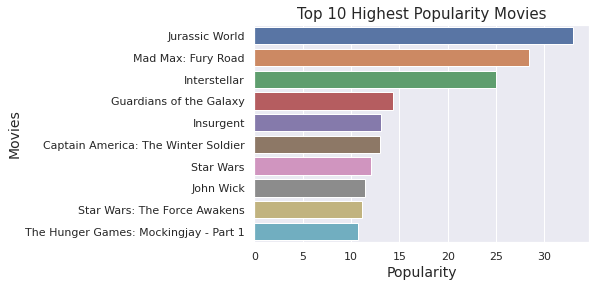

In [37]:
top_pop = df.nlargest(10, 'popularity')
bar_plot(top_pop,'popularity','original_title',"Top 10 Highest Popularity Movies",'Popularity','Movies')

> **Jurassic World** directed by **Colin Trevorrow** release in 2015 has the highest popularity and **Born into Brothels** is the movie with least popularity.

### 8. Which year has the highest and lowest release of movies?

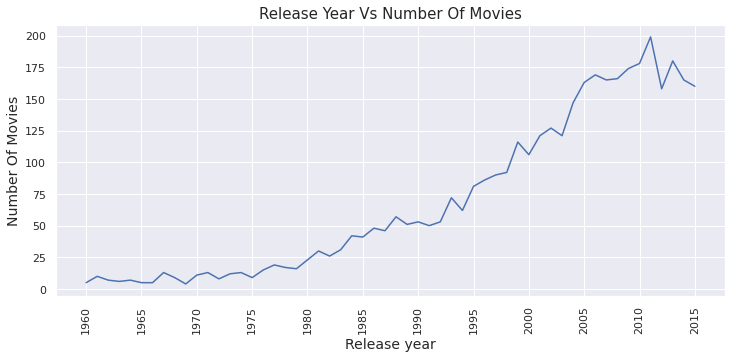

In [38]:
#make group for each year and count the number of movies in each year 
df.groupby("release_year")['genres'].count().plot(xticks = np.arange(1960,2016,5),figsize=(12,5));
plt.title("Release Year Vs Number Of Movies",fontsize = 15)
plt.xticks(rotation=90)
plt.xlabel('Release year',fontsize = 14)
plt.ylabel('Number Of Movies',fontsize = 14);

> Highest number of movie release was in **2011** with total of 199 and the least number of movie release was in **1969** with total number of 4. From the graph, the number of movie released per year increases as years goes by.

### 9. Which year has the highest and lowest runtime?

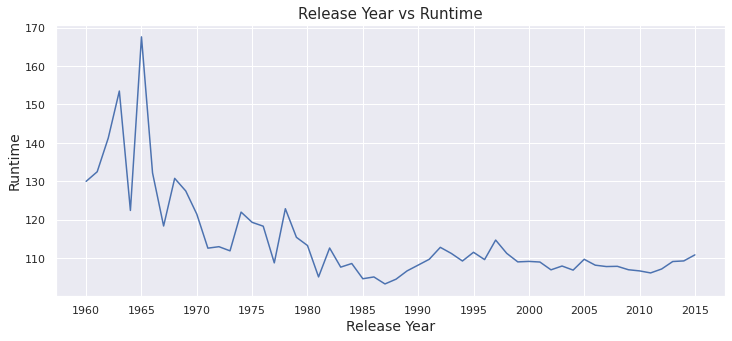

In [39]:
#make the group of the data according to their release_year and find the mean  related to this and plot.
df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5),figsize=(12,5))
plt.title("Release Year vs Runtime",fontsize = 15)
plt.xlabel('Release Year',fontsize = 14)
plt.ylabel('Runtime',fontsize = 14);

> Highest number of runtime was in **1965** with total of 167 and the least number of movie runtime was in **2011** with total number of 106.1. From the graph, the number of movie runtime per year decreases as years goes by.

### 10. Which genre occured most?

In [40]:
# Create a dictionary  of genre and total number of it occurance
genre = {}
for y in df['genres'].values:
    item = y.split("|")
    for gen in item:
        if gen not in genre:
            genre[gen] = 1
        else:
            genre[gen] = genre[gen] + 1
    

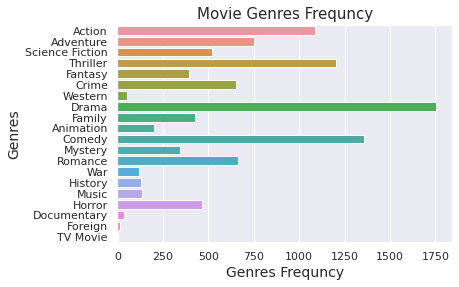

In [41]:
gen_df = pd.DataFrame.from_dict(genre,orient='index')
gen_df.reset_index(inplace=True)
gen_df.rename(columns={'index':'genres',0: "total"},inplace=True)
bar_plot(gen_df,'total','genres',"Movie Genres Frequncy",'Genres Frequncy','Genres')

> **Drama** is the gener the occured in most of the movies followed by **Comedy** then by **Thriller** and **Action**

### 11. Which genres are most popular from year to year?

In [42]:
#create list of years 
years = []
for x in df['release_year']:
    if x not in years:
        years.append(x)

In [43]:
# Sort the year in ascending order
years.sort()

In [44]:
# Create a dataframe for most genere
df_gen = pd.DataFrame(columns=['year','genres','count'])
for year in years:
    genre = {}
    for y in df[df.release_year == year]['genres'].values:
        item = y.split("|")
        for gen in item:
            if gen not in genre:
                genre[gen] = 1
            else:
                genre[gen] = genre[gen] + 1
    df_gen = df_gen.append({'year':year, 'genres':max(genre,key=genre.get), 'count':genre[max(genre,key=genre.get)]},ignore_index=True) 


In [45]:
df_gen

,year,genres,count
0,1960,Drama,3
1,1961,Drama,6
2,1962,Drama,5
3,1963,Thriller,3
4,1964,Drama,4
5,1965,Drama,3
6,1966,Drama,2
7,1967,Drama,7
8,1968,Drama,6
9,1969,Adventure,2


 > From the table above, each year in this table show the most popular movie genre and the number of movies.

### 12. How much do the movie genres changes from year to year?

In [46]:
#Create a dataframe for number of each genre in each year
df_genc = pd.DataFrame(columns=['year','genre','count'])
for year in years:
    for y in df[df.release_year == year]['genres'].values:
        item = y.split("|")
        for gen in item:
            df_genc = df_genc.append({'year':year, 'genre':gen, 'count':1},ignore_index=True)

In [47]:
# Group the dataframe to year and genre index
df_yrgen =df_genc.groupby(['year','genre']).count()

In [48]:
# Use a pivot table to rearange the dataframe
df_edit = df_yrgen.pivot_table(values='count',columns='genre',index='year')

In [49]:
# fill any missing field with 0
df_edit.fillna(0, inplace=True)

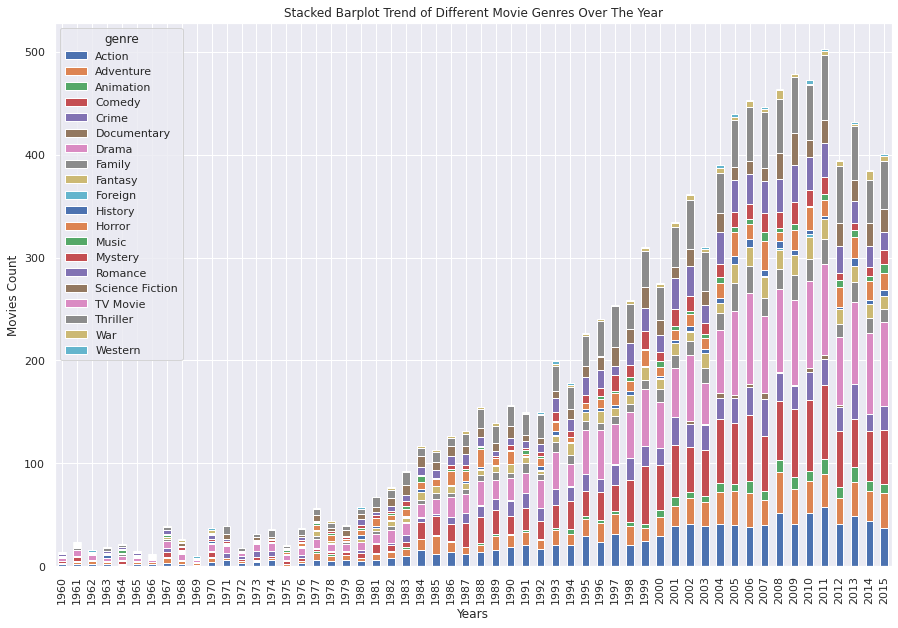

In [50]:
# Plot the dataframe
df_edit.plot(kind='bar', stacked=True,figsize=(15,10),
        xlabel='Years', ylabel='Movies Count',title = 'Stacked Barplot Trend of Different Movie Genres Over The Year');

> The plot shows that the movie genres show an increase in numbers from 1960 to 2015.  **Drama** shows to be that gener the occured in most of the movies followed by **Comedy** then by **Thriller** and **Action**

### 13. What kinds of properties are associated with movies that have high revenues?

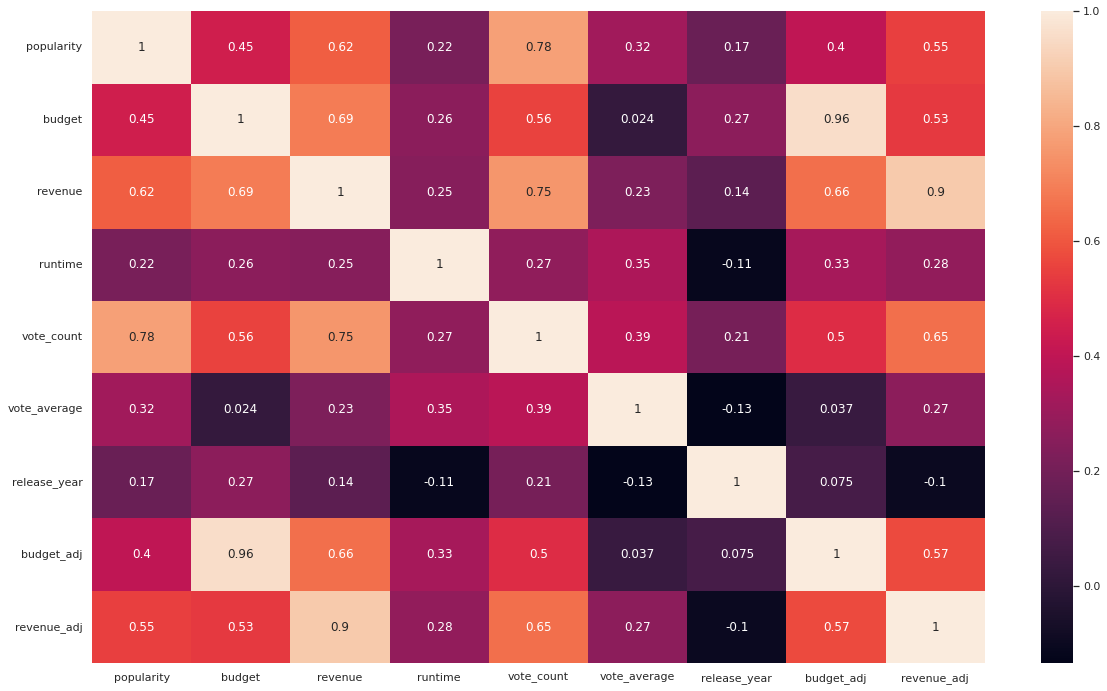

In [51]:
plt.subplots(figsize =( 20 , 12 ))
sns.heatmap(df.corr(), annot=True);

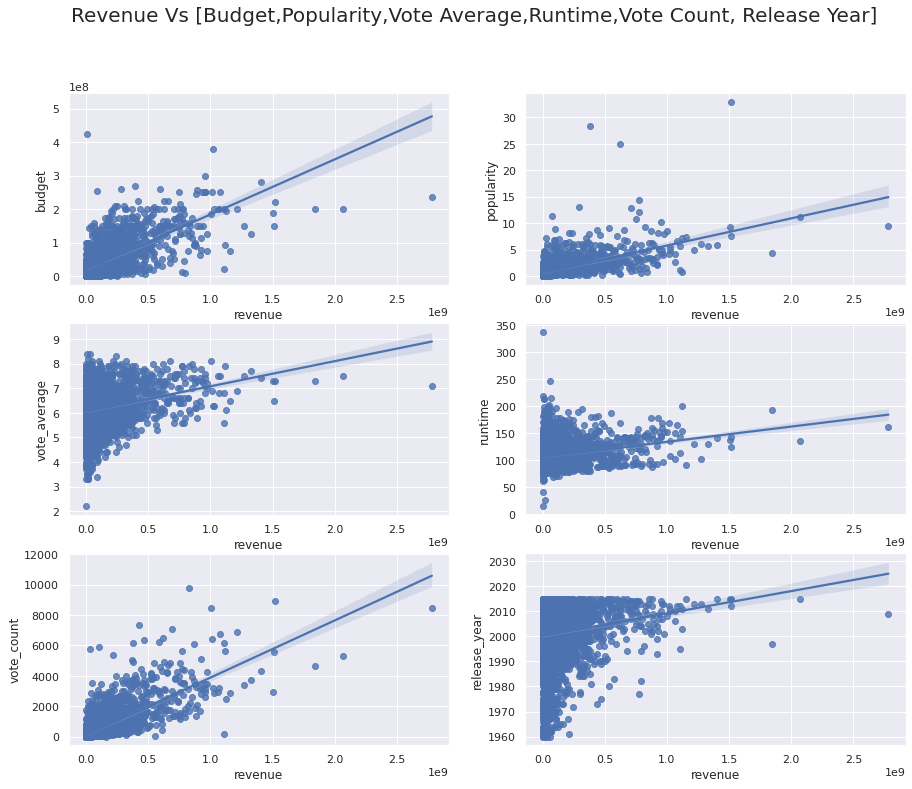

In [52]:
fig, axes = plt.subplots(3,2,figsize = (15,12))
fig.suptitle("Revenue Vs [Budget,Popularity,Vote Average,Runtime,Vote Count, Release Year]",fontsize=20)
sns.regplot(x=df['revenue'], y=df['budget'],ax=axes[0][0])
sns.regplot(x=df['revenue'], y=df['popularity'],ax=axes[0][1])
sns.regplot(x=df['revenue'], y=df['vote_average'],ax=axes[1][0])
sns.regplot(x=df['revenue'], y=df['runtime'],ax=axes[1][1]);
sns.regplot(x=df['revenue'], y=df['vote_count'],ax=axes[2][0])
sns.regplot(x=df['revenue'], y=df['release_year'],ax=axes[2][1]);

> ### The 6 plot above shows regression plot of revenue against Budget,Popularity,Vote Average,Runtime,Vote Count and Release Year

>**1. Revenue vs Budget**
The correlation between revenue and budget is 0.69 .So it is a good possibility that movies with high budgets result in a higher revenues.
Correlation = 0.69

> **2. Revenue vs popularity**
The revenue seems to be increasing with popularity. We can say that if the popularity of movie is high then the revenue of the movie may be high.
Correlation = 0.62

> **3. Revenue vs Vote Average**
The correlation between revenue and vote average is 0.23. So vote average is not highly related to the revenue.
Correlation = 0.23

>**4. Revenue vs Runtime**
The correlation between revenue and runtime is 0.25. So runtime is not highly related to the revenue.
Correlation = 0.25

> **5. Revenue vs Vote Count**
The correlation between revenue and vote average is high. So vote count is highly related to revenue, therefore increase in vote count may leads to increase in revenue.
Correlation = 0.75

> **6. Revenue vs Release Year**
The correlation between revenue and release year is low . So release year is have low impact on Revenue
Correlation = 0.14

<a id='conclusions'></a>
## Conclusions


> - Drama, Comedy, Thriller and Action are four genres that occured most from year to year.
> - 2011 is the year in which highest number of movie was releases and the year with least runtime.
> - The movies 'Avatar', 'Star Wars: the force awaken' and 'Titanic' are the most profitable movie and the high revenue generated.
> - The most popular genre is Drama following by comedy and thriller.
> - The most popular movie is Jurasic World followed by Mad Max: fury road and Interstellar.
> - Average runtime of the movies are decreasing year by year.
> - Movie vote average and release yease shows to have a low impact on the revenue.
> - Movies with higher budgets and vote count have shown a possiblity of an increase in the revenues.

> Some limitations of this dataset is that it contains null and zero values in some features. These zero and null values hinders the analysis and have to be removed. As a result the dataset was reduced significantly, Even at that some revenue  contains value of 2 for movie with thousands of investment. 

## Reference
[Pandas Documentation](https://pandas.pydata.org/docs/index.html).

[Seaborn plot assistance](https://seaborn.pydata.org/examples/index.html)

[Get some in-built function](https://datascientyst.com/getting-started/)

[Kaggle similar dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/code?select=tmdb_5000_movies.csv)